## Oscillating Pitman Model

Solving:

$$\frac{dx^*}{dt^*} = -2\pi \sin(2\pi t^*) - 2\pi \Psi x^* $$

## Euler's Method

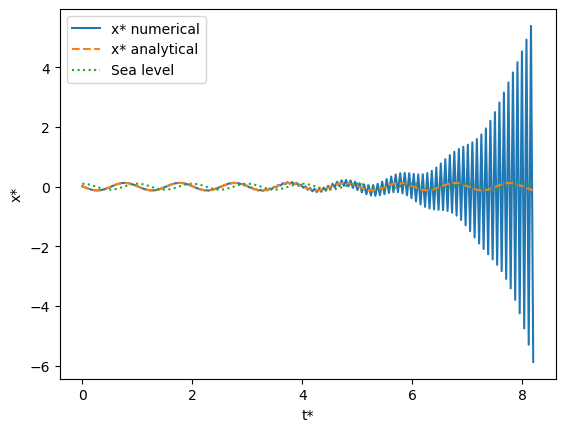

In [22]:
# Import stuff I need
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
R_SS = 2.5*10**-5 # Rate of subsidence at shelf edge in m/yr 
P = 10**8 # Period of sea level oscillations yr
omega = 2.*np.pi/P # Angular frequency of sea level oscillation
alpha = 1./5000. # shelf slope (dimensionless)
D = 2.5*10**5 # distance from hinge to shelf edge (m)
psi = R_SS/(alpha*D*omega)

# Set up solution arrays, timestep, and initial condition
dt = 0.041 # Fraction of period
nsteps = 200
t = np.arange(nsteps+1)*dt
x = np.zeros(nsteps+1)
# Calculate analytical solution
x_ana = -1./np.sqrt(psi**2 + 1) * np.sin(2*np.pi*t - np.arctan(1/psi))
x[0] = x_ana[0]


# Create function that calculates dx_dt
def dx_dt(t, x):
    return -2*np.pi*np.sin(2*np.pi*t) - 2*np.pi*psi*x

# Loop through timesteps and calculate shoreline position for each time
for tstep in np.arange(nsteps):
    x[tstep+1] = x[tstep] + dt*dx_dt(t[tstep], x[tstep])
    
# Plot solution and sea level oscillations
A_SL = 0.1
Y_SL = A_SL * np.cos(2*np.pi*t)
plt.plot(t, x)
plt.plot(t, x_ana, '--')
plt.plot(t, Y_SL, ':')
plt.xlabel('t*')
plt.ylabel('x*')
plt.legend(['x* numerical', 'x* analytical', 'Sea level'])
#plt.xlim([0,0.1])


### Midpoint method

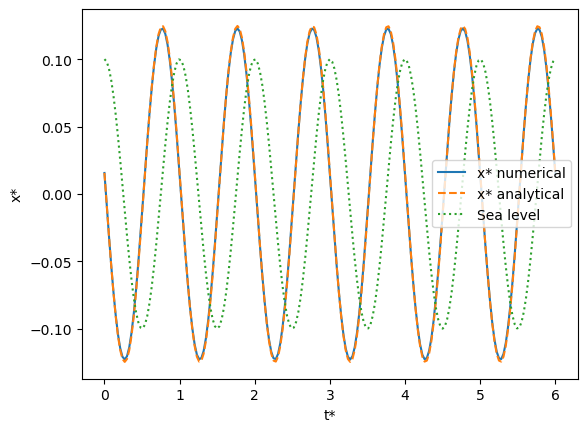

In [24]:
# Import stuff I need
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
R_SS = 2.5*10**-5 # Rate of subsidence at shelf edge in m/yr 
P = 10**8 # Period of sea level oscillations yr
omega = 2.*np.pi/P # Angular frequency of sea level oscillation
alpha = 1./5000. # shelf slope (dimensionless)
D = 2.5*10**5 # distance from hinge to shelf edge (m)
psi = R_SS/(alpha*D*omega)

# Set up solution arrays, timestep, and initial condition
dt = 0.03 # Fraction of period
nsteps = 200
t = np.arange(nsteps+1)*dt
x = np.zeros(nsteps+1)
# Calculate analytical solution
x_ana = -1./np.sqrt(psi**2 + 1) * np.sin(2*np.pi*t - np.arctan(1/psi))
x[0] = x_ana[0]


# Create function that calculates dx_dt
def dx_dt(t, x):
    return -2*np.pi*np.sin(2*np.pi*t) - 2*np.pi*psi*x

# Loop through timesteps and calculate shoreline position for each time
for tstep in np.arange(nsteps):
    k1 = dt*dx_dt(t[tstep], x[tstep])
    k2 = dt*dx_dt(t[tstep] + dt/2, x[tstep] + k1/2)
    x[tstep+1] = x[tstep] + k2
    
# Plot solution and sea level oscillations
A_SL = 0.1
Y_SL = A_SL * np.cos(2*np.pi*t)
plt.plot(t, x)
plt.plot(t, x_ana, '--')
plt.plot(t, Y_SL, ':')
plt.xlabel('t*')
plt.ylabel('x*')
plt.legend(['x* numerical', 'x* analytical', 'Sea level'])
#plt.xlim([0,0.1])


### 4th Order Runga-Kutta

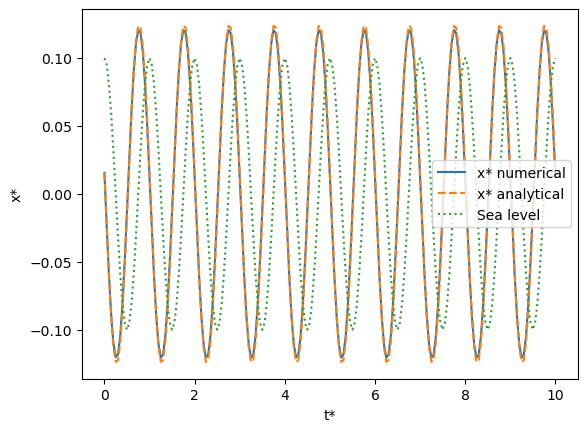

In [30]:
# Import stuff I need
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
R_SS = 2.5*10**-5 # Rate of subsidence at shelf edge in m/yr 
P = 10**8 # Period of sea level oscillations yr
omega = 2.*np.pi/P # Angular frequency of sea level oscillation
alpha = 1./5000. # shelf slope (dimensionless)
D = 2.5*10**5 # distance from hinge to shelf edge (m)
psi = R_SS/(alpha*D*omega)

# Set up solution arrays, timestep, and initial condition
dt = 0.05 #raction of period
nsteps = 200
t = np.arange(nsteps+1)*dt
x = np.zeros(nsteps+1)
# Calculate analytical solution
x_ana = -1./np.sqrt(psi**2 + 1) * np.sin(2*np.pi*t - np.arctan(1/psi))
x[0] = x_ana[0]


# Create function that calculates dx_dt
def dx_dt(t, x):
    return -2*np.pi*np.sin(2*np.pi*t) - 2*np.pi*psi*x

# Loop through timesteps and calculate shoreline position for each time
for tstep in np.arange(nsteps):
    k1 = dt*dx_dt(t[tstep], x[tstep])
    k2 = dt*dx_dt(t[tstep] + dt/2, x[tstep] + k1/2)
    k3 = dt*dx_dt(t[tstep] + dt/2, x[tstep] + k2/2)
    k4 = dt*dx_dt(t[tstep] + dt, x[tstep] + k3)
    x[tstep+1] = x[tstep] + k1/6 + k2/3 + k3/3 + k4/6
    
# Plot solution and sea level oscillations
A_SL = 0.1
Y_SL = A_SL * np.cos(2*np.pi*t)
plt.plot(t, x)
plt.plot(t, x_ana, '--')
plt.plot(t, Y_SL, ':')
plt.xlabel('t*')
plt.ylabel('x*')
plt.legend(['x* numerical', 'x* analytical', 'Sea level'])
#plt.xlim([0,0.1])


### Solution using odeint()

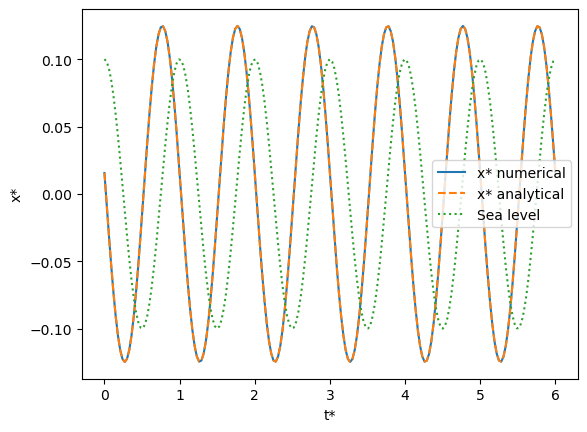

In [37]:
# Import stuff I need
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define parameters
R_SS = 2.5*10**-5 # Rate of subsidence at shelf edge in m/yr 
P = 10**8 # Period of sea level oscillations yr
omega = 2.*np.pi/P # Angular frequency of sea level oscillation
alpha = 1./5000. # shelf slope (dimensionless)
D = 2.5*10**5 # distance from hinge to shelf edge (m)
psi = R_SS/(alpha*D*omega)

# Set up solution arrays, timestep, and initial condition
dt = 0.03 # Fraction of period
nsteps = 200
t = np.arange(nsteps+1)*dt
# Calculate analytical solution
x_ana = -1./np.sqrt(psi**2 + 1) * np.sin(2*np.pi*t - np.arctan(1/psi))


# Create function that calculates dx_dt
def dx_dt(x, t, Psi):
    return -2*np.pi*np.sin(2*np.pi*t) - 2*np.pi*Psi*x

# Calculate solution using odeint
x_sol, info = odeint(dx_dt, x_ana[0], t, args=(psi,), full_output=True)


# Plot solution and sea level oscillations
A_SL = 0.1
Y_SL = A_SL * np.cos(2*np.pi*t)
plt.plot(t, x_sol)
plt.plot(t, x_ana, '--')
plt.plot(t, Y_SL, ':')
plt.xlabel('t*')
plt.ylabel('x*')
plt.legend(['x* numerical', 'x* analytical', 'Sea level'])
#plt.xlim([0,0.1])


In [36]:
info

{'hu': array([0.011     , 0.00875125, 0.00713424, 0.009     , 0.009     ,
        0.009     , 0.009     , 0.009     , 0.009     , 0.009     ,
        0.009     , 0.009     , 0.009     , 0.009     , 0.009     ,
        0.009     , 0.009     , 0.009     , 0.009     , 0.009     ,
        0.009     , 0.009     , 0.009     , 0.009     , 0.009     ,
        0.009     , 0.009     , 0.009     , 0.009     , 0.009     ,
        0.009     , 0.009     , 0.009     , 0.009     , 0.009     ,
        0.009     , 0.009     , 0.009     , 0.009     , 0.009     ,
        0.009     , 0.009     , 0.009     , 0.009     , 0.009     ,
        0.009     , 0.009     , 0.009     , 0.009     , 0.009     ,
        0.009     , 0.009     , 0.009     , 0.009     , 0.009     ,
        0.009     , 0.009     , 0.009     , 0.009     , 0.009     ,
        0.009     , 0.009     , 0.009     , 0.009     , 0.009     ,
        0.009     , 0.009     , 0.009     , 0.009     , 0.009     ,
        0.009     , 0.009     , 0.009     